In [21]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random

In [22]:
np.random.seed(0)

In [23]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [24]:
assert(X_train.shape[0]==y_train.shape[0]),'The number of images is not equal to the number of labels.'
assert(X_test.shape[0]==y_test.shape[0]),'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:]==(28,28)),"The dimensions of the images are not 28*28"


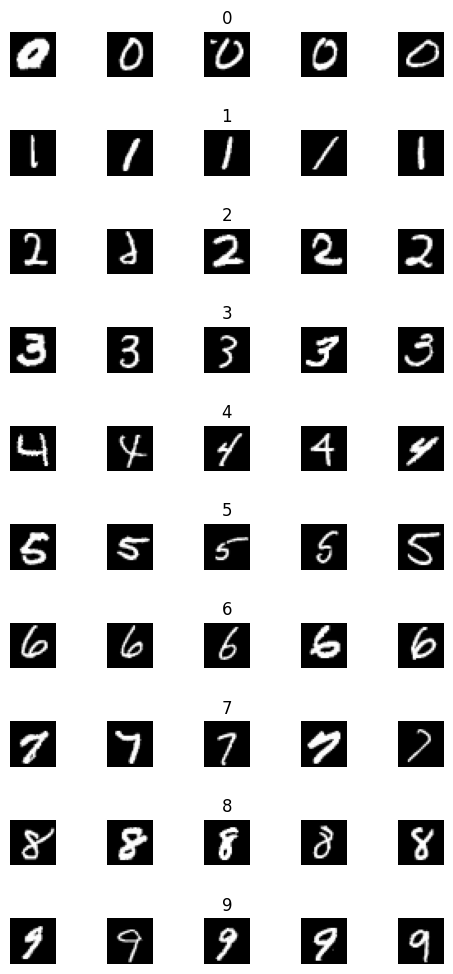

In [25]:
num_of_samples=[]
cols=5
num_classes=10

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

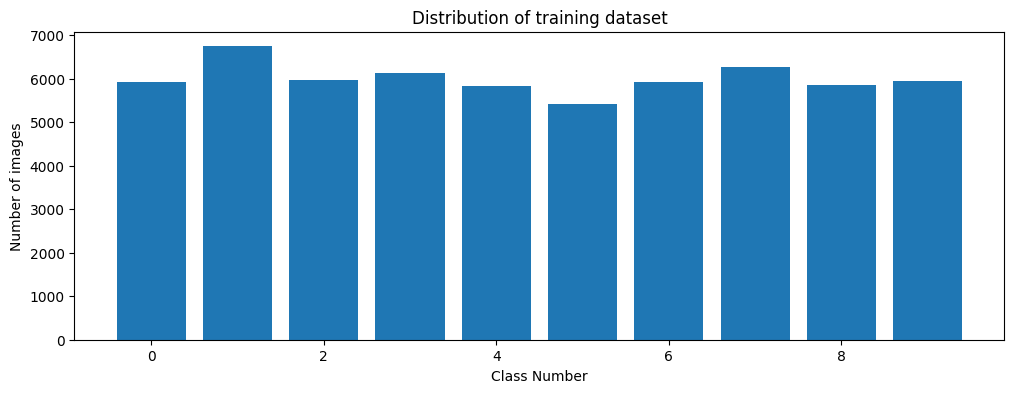

In [26]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [38]:
y_train=to_categorical(y_train,10)

In [39]:
y_test=to_categorical(y_test,10)

In [40]:
X_train=X_train/255
X_test=X_test/255

In [41]:
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
X_test=X_test.reshape(X_test.shape[0],num_pixels)

In [55]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=num_pixels,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [56]:
model=create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 30)                330       
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 2ms/step - loss: 1.4600 - accuracy: 0.4577 - val_loss: 0.9365 - val_accuracy: 0.6818
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.8164 - accuracy: 0.7272 - val_loss: 0.5655 - val_accuracy: 0.8292
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.8225 - val_loss: 0.4919 - val_accuracy: 0.8520
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.8473 - val_loss: 0.4270 - val_accuracy: 0.8747
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8566 - val_loss: 0.4016 - val_accuracy: 0.8783
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8644 - val_loss: 0.3781 - val_accuracy: 0.8872
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8711 - val_loss: 0.3700 - val_accuracy: 0.8900
Epoch 

Text(0.5, 0, 'epoch')

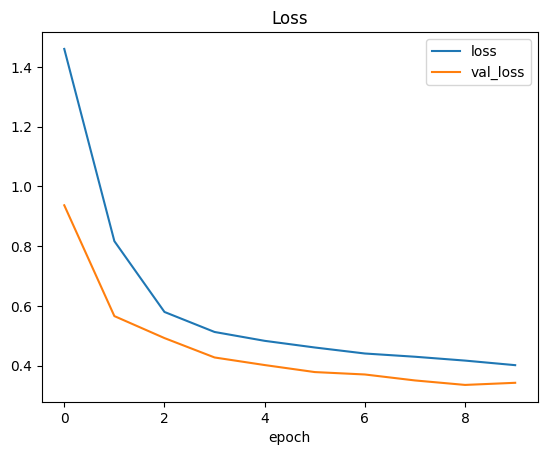

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

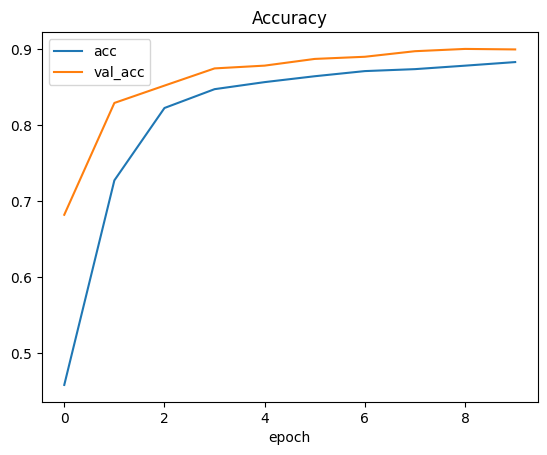

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [60]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3990623652935028
Test accuracy: 0.8830999732017517


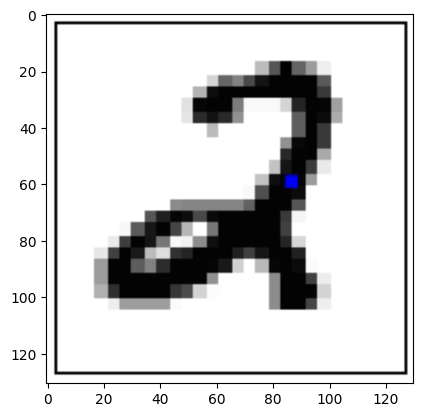

In [67]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

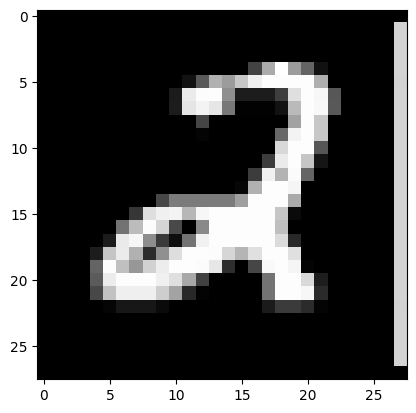

In [68]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [69]:
img = img/255
img = img.reshape(1, 784)
 
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 15ms/step
predicted digit: [2]
